In [4]:
import pandas as pd
from pathlib  import Path

ONEDRIVE_PATH = Path(r"C:\Users\yairs\OneDrive")
# ONEDRIVE_PATH =  Path(r"C:\Users\TalPNB22\OneDrive")

WINTER_CSV_PATH = ONEDRIVE_PATH / "Documents" / "University" / "Master" / "Ships" / "routes expirements from noa" / "winter_data_fixed.csv"

df = pd.read_csv(WINTER_CSV_PATH)
df['dying_day'] = df['dying_day'].astype(pd.Int64Dtype())
df.head()

,Season,Name,Replicate,Place,Sampling Date,Body Size (cm),Temp 0,Temp 1,Temp 2,Temp 3,...,Lived 34,Lived 35,Lived 36,Lived 37,Lived 38,Lived 39,Lived 40,Lived 41,Lived 42,dying_day
0,winter,PISCES,a,Ashdod,21.3.24,4.0,22,9,17.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,winter,PISCES,b,Ashdod,21.3.24,9.0,22,9,17.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,winter,PISCES,c,Ashdod,21.3.24,5.0,22,9,17.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,winter,ELPIDA,a,Ashdod,21.3.24,7.5,22,9,9.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,winter,ELPIDA,b,Ashdod,21.3.24,8.0,22,9,9.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


[Text(0, 0, '(1.962, 5.8]'),
 Text(1, 0, '(5.8, 9.6]'),
 Text(2, 0, '(9.6, 13.4]'),
 Text(3, 0, '(13.4, 17.2]'),
 Text(4, 0, '(17.2, 21.0]'),
 Text(5, 0, '(21.0, 24.8]'),
 Text(6, 0, '(24.8, 28.6]'),
 Text(7, 0, '(28.6, 32.4]'),
 Text(8, 0, '(32.4, 36.2]'),
 Text(9, 0, '(36.2, 40.0]')]

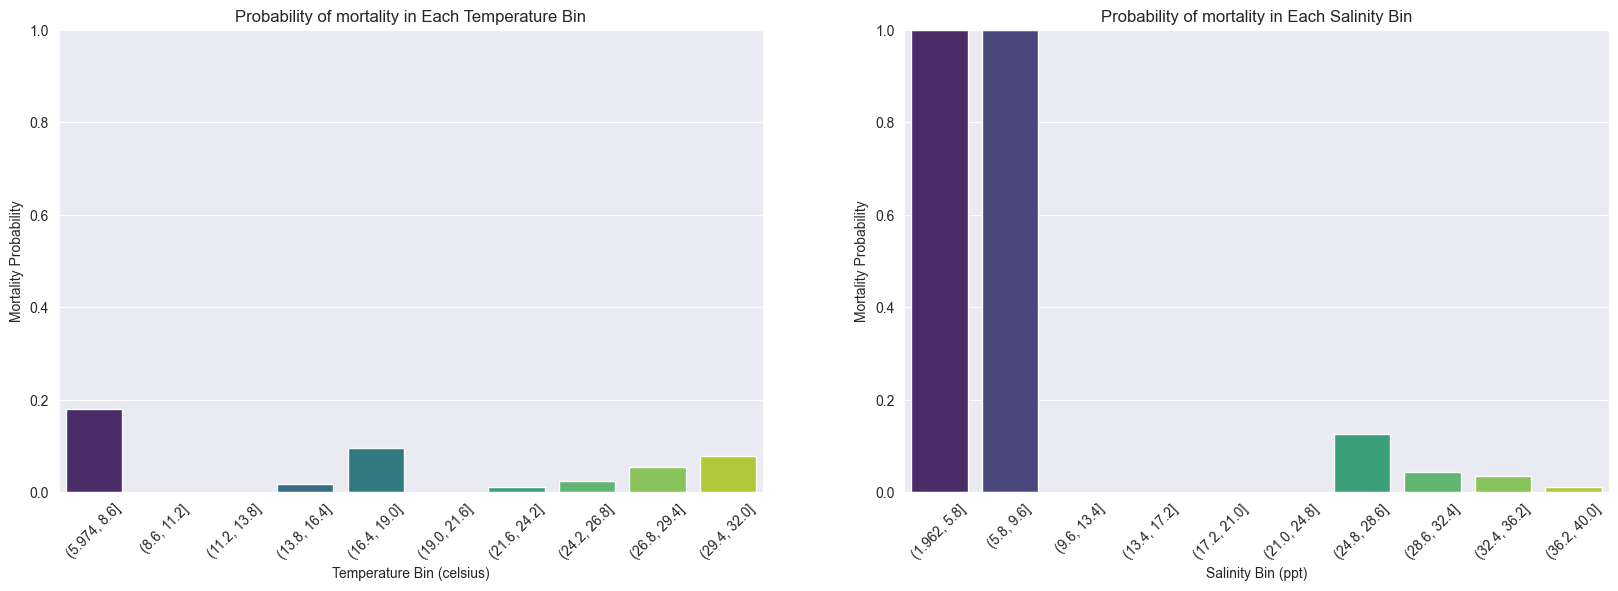

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

num_bins = 10

lived_columns = [col for col in df.columns if 'Lived' in col]
lived_df = df.melt(value_vars=lived_columns, var_name='Lived', value_name='Lived_Value')
lived_df['id'] = lived_df.index

# Mortality Probability against temperature bin
temperature_columns = [col for col in df.columns if 'Temp' in col]
temperature_df = df.melt(value_vars=temperature_columns, var_name='Temperature', value_name='Temperature_Value')
temperature_df['id'] = temperature_df.index

temperature_lived_df = pd.merge(temperature_df, lived_df, on='id')
temperature_lived_df = temperature_lived_df[['Temperature_Value', 'Lived_Value']]
# temperature_lived_df['Temp_Bin'] = pd.qcut(temperature_lived_df['Temperature_Value'], q=num_bins)
temperature_lived_df['Temp_Bin'] = pd.cut(temperature_lived_df['Temperature_Value'], bins=num_bins)

probability_against_temp = temperature_lived_df.groupby('Temp_Bin')['Lived_Value'].mean().reset_index()
probability_against_temp.columns = ['Temp_Bin', 'Survival_Probability']
probability_against_temp['Mortality_Probability'] = 1 - probability_against_temp['Survival_Probability']

# Mortality Probability against salinity bin
salinity_columns = [col for col in df.columns if 'Salinity' in col]
salinity_df = df.melt(value_vars=salinity_columns, var_name='Salinity', value_name='Salinity_Value')
salinity_df['id'] = salinity_df.index

salinity_lived_df = pd.merge(salinity_df, lived_df, on='id')
salinity_lived_df = salinity_lived_df[['Salinity_Value', 'Lived_Value']]
salinity_lived_df['Salinity_Bin'] = pd.cut(salinity_lived_df['Salinity_Value'], bins=num_bins)

probability_against_salinity = salinity_lived_df.groupby('Salinity_Bin')['Lived_Value'].mean().reset_index()
probability_against_salinity.columns = ['Salinity_Bin', 'Survival_Probability']
probability_against_salinity['Mortality_Probability'] = 1 - probability_against_salinity['Survival_Probability']

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(x='Temp_Bin', y='Mortality_Probability', data=probability_against_temp, palette='viridis', ax=axs[0])
axs[0].set_title('Probability of mortality in Each Temperature Bin')
axs[0].set_xlabel('Temperature Bin (celsius)')
axs[0].set_ylabel('Mortality Probability')
axs[0].set_ylim(0, 1)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

sns.barplot(x='Salinity_Bin', y='Mortality_Probability', data=probability_against_salinity, palette='viridis', ax=axs[1])
axs[1].set_title('Probability of mortality in Each Salinity Bin')
axs[1].set_xlabel('Salinity Bin (ppt)')
axs[1].set_ylabel('Mortality Probability')
axs[1].set_ylim(0, 1)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

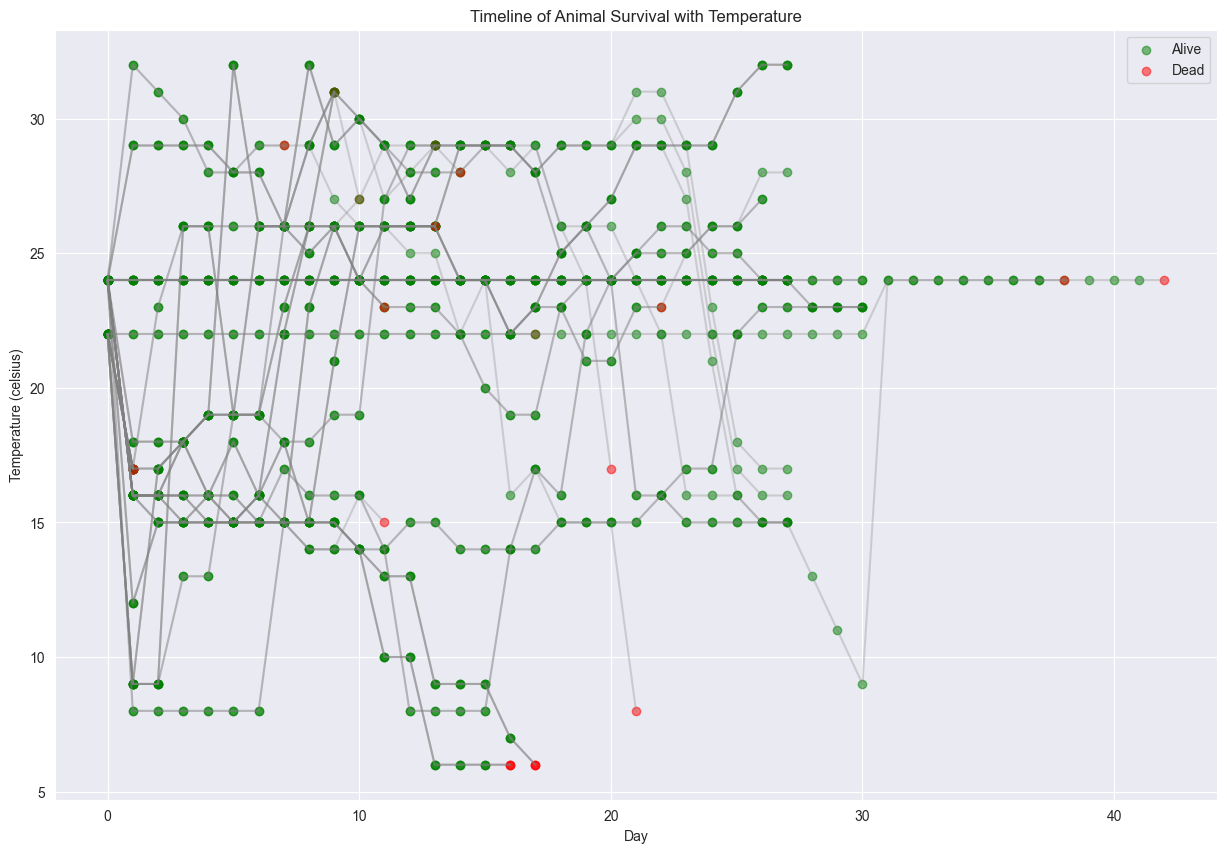

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
lived_columns = sorted([col for col in df.columns if 'Lived' in col], key=lambda x: int(x.split()[1]))
temperature_columns = sorted([col for col in df.columns if 'Temp' in col], key=lambda x: int(x.split()[1]))

# Iterating through a subset of the data to plot timelines
for index, row in df.iterrows():
    survival = row[lived_columns].values
    temperature = row[temperature_columns].values
    days = range(len(survival))

    plt.plot(days, temperature, color='gray', alpha=0.3)  # Plot temperature line

    alive_days = [day for day, status in zip(days, survival) if status == 1]
    dead_days = [day for day, status in zip(days, survival) if status == 0]

    alive_temps = [temp for temp, status in zip(temperature, survival) if status == 1]
    dead_temps = [temp for temp, status in zip(temperature, survival) if status == 0]

    plt.scatter(alive_days, alive_temps, color='green', alpha=0.5, label='Alive' if index == 0 else "")
    plt.scatter(dead_days, dead_temps, color='red', alpha=0.5, label='Dead' if index == 0 else "")

plt.title('Timeline of Animal Survival with Temperature')
plt.xlabel('Day')
plt.ylabel('Temperature (celsius)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

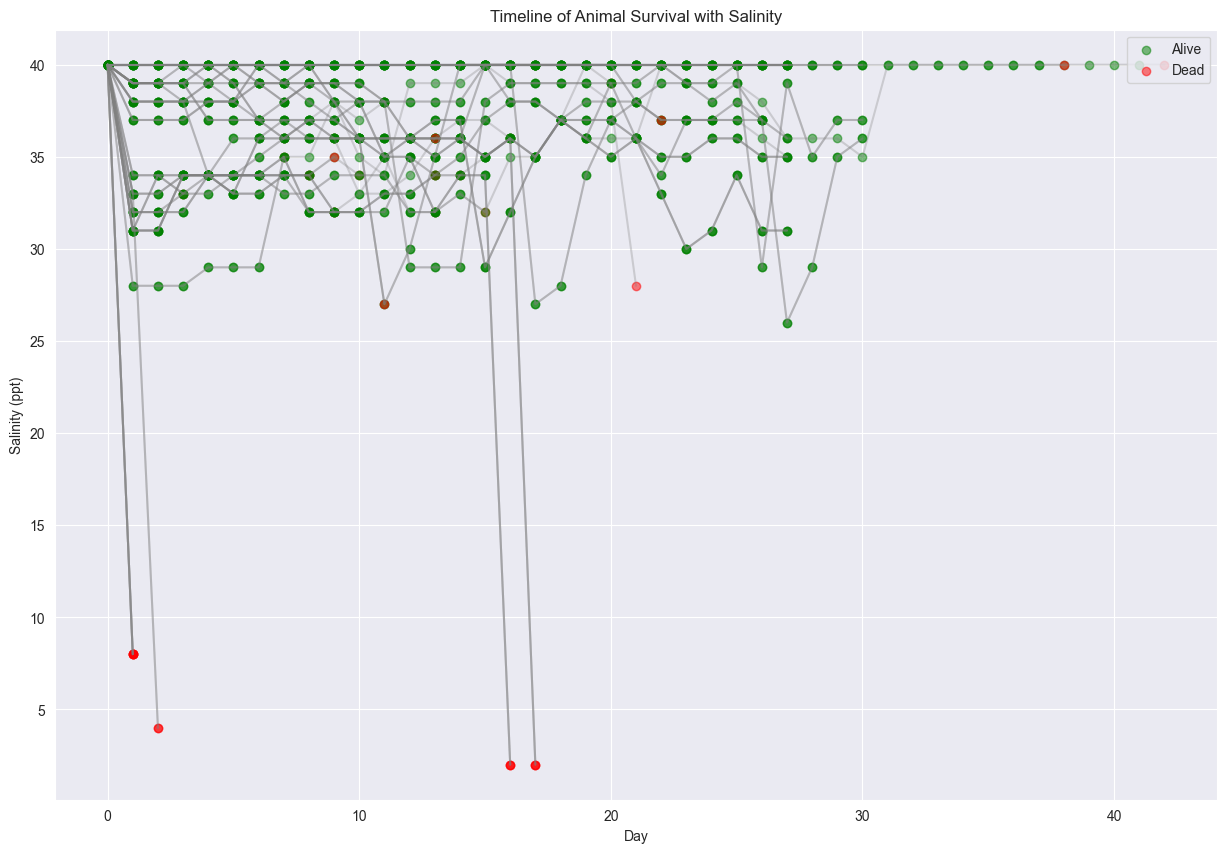

In [38]:
plt.figure(figsize=(15, 10))
salinity_columns = sorted([col for col in df.columns if 'Salinity' in col], key=lambda x: int(x.split()[1]))

# Iterating through a subset of the data to plot timelines
for index, row in df.iterrows():
    survival = row[lived_columns].values
    salinity = row[salinity_columns].values
    days = range(len(survival))

    plt.plot(days, salinity, color='gray', alpha=0.3)  # Plot temperature line

    alive_days = [day for day, status in zip(days, survival) if status == 1]
    dead_days = [day for day, status in zip(days, survival) if status == 0]

    alive_salinities = [salinity for salinity, status in zip(salinity, survival) if status == 1]
    dead_salinities = [salinity for salinity, status in zip(salinity, survival) if status == 0]

    plt.scatter(alive_days, alive_salinities, color='green', alpha=0.5, label='Alive' if index == 0 else "")
    plt.scatter(dead_days, dead_salinities, color='red', alpha=0.5, label='Dead' if index == 0 else "")

plt.title('Timeline of Animal Survival with Salinity')
plt.xlabel('Day')
plt.ylabel('Salinity (ppt)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [49]:
# Crea new_df with each row represent 2 consecutive days in a route

new_rows = []
for index, row in df.iterrows():
    for col in temperature_columns[:-1]:
        col_day = int(col.split(' ')[1])
        if pd.isna(row[f'Lived {col_day + 1}']):  # Row (route) is done
            break
        new_row = {
            'Season': row['Season'],
            'Name': row['Name'],
            'Replicate': row['Replicate'],
            'Place': row['Place'],
            'Sampling Date': row['Sampling Date'],
            'Body Size (cm)': row['Body Size (cm)'],
            'Temp from': row[f'Temp {col_day}'],
            'Temp to': row[f'Temp {col_day + 1}'],
            'Salinity from': row[f'Salinity {col_day}'],
            'Salinity to': row[f'Salinity {col_day + 1}'],
            'Lived from': row[f'Lived {col_day}'],
            'Lived to': row[f'Lived {col_day + 1}']
        }
        new_rows.append(new_row)

new_df = pd.DataFrame(new_rows)

In [50]:
new_df

,Season,Name,Replicate,Place,Sampling Date,Body Size (cm),Temp from,Temp to,Salinity from,Salinity to,Lived from,Lived to
0,winter,PISCES,a,Ashdod,21.3.24,4.0,22.0,9.0,40.0,31.0,1.0,1.0
1,winter,PISCES,a,Ashdod,21.3.24,4.0,9.0,17.0,31.0,34.0,1.0,1.0
2,winter,PISCES,a,Ashdod,21.3.24,4.0,17.0,18.0,34.0,33.0,1.0,1.0
3,winter,PISCES,a,Ashdod,21.3.24,4.0,18.0,19.0,33.0,33.0,1.0,1.0
4,winter,PISCES,a,Ashdod,21.3.24,4.0,19.0,19.0,33.0,34.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1081,winter,CONTROL,f,Akko,20.5.24,5.0,24.0,24.0,40.0,40.0,1.0,1.0
1082,winter,CONTROL,f,Akko,20.5.24,5.0,24.0,24.0,40.0,40.0,1.0,1.0
1083,winter,CONTROL,f,Akko,20.5.24,5.0,24.0,24.0,40.0,40.0,1.0,1.0
1084,winter,CONTROL,f,Akko,20.5.24,5.0,24.0,24.0,40.0,40.0,1.0,1.0


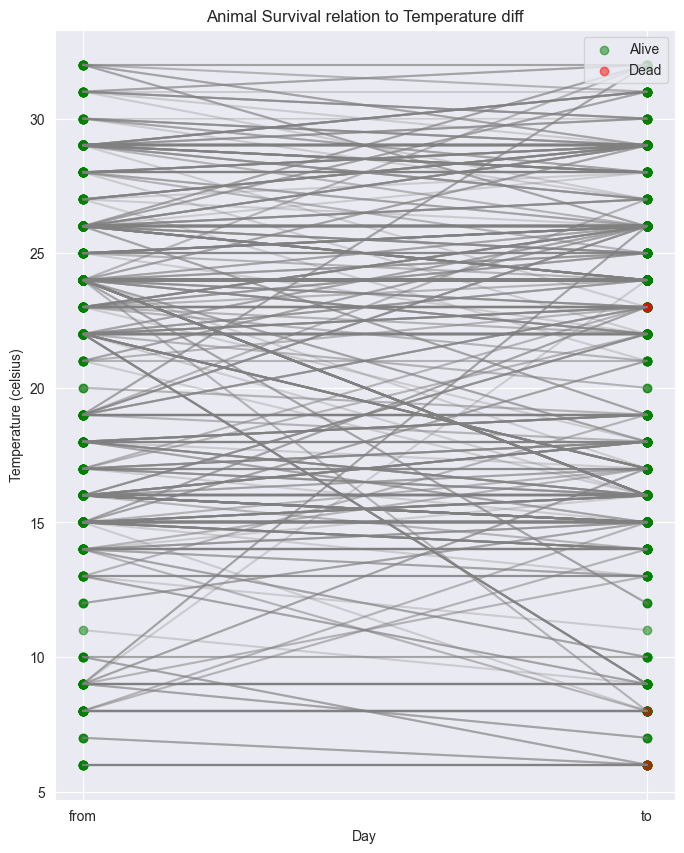

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))
lived_columns = ['Lived from', 'Lived to']
temperature_columns = ['Temp from', 'Temp to']

# Iterating through a subset of the data to plot timelines
for index, row in new_df.iterrows():
    survival = row[lived_columns].values
    temperature = row[temperature_columns].values
    days = ['from', 'to']

    plt.plot(days, temperature, color='gray', alpha=0.3)  # Plot temperature line

    alive_days = [day for day, status in zip(days, survival) if status == 1]
    dead_days = [day for day, status in zip(days, survival) if status == 0]

    alive_temps = [temp for temp, status in zip(temperature, survival) if status == 1]
    dead_temps = [temp for temp, status in zip(temperature, survival) if status == 0]

    plt.scatter(alive_days, alive_temps, color='green', alpha=0.5, label='Alive' if index == 0 else "")
    plt.scatter(dead_days, dead_temps, color='red', alpha=0.5, label='Dead' if index == 0 else "")

plt.title('Animal Survival relation to Temperature diff')
plt.xlabel('Day')
plt.ylabel('Temperature (celsius)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

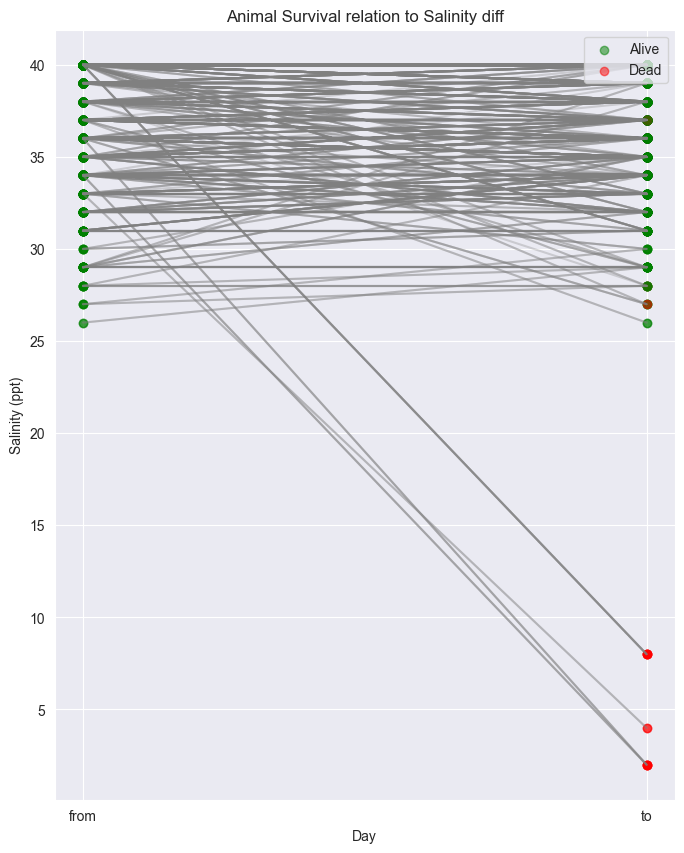

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))
lived_columns = ['Lived from', 'Lived to']
salinity_columns = ['Salinity from', 'Salinity to']

# Iterating through a subset of the data to plot timelines
for index, row in new_df.iterrows():
    survival = row[lived_columns].values
    salinity = row[salinity_columns].values
    days = ['from', 'to']

    plt.plot(days, salinity, color='gray', alpha=0.3)  # Plot temperature line

    alive_days = [day for day, status in zip(days, survival) if status == 1]
    dead_days = [day for day, status in zip(days, survival) if status == 0]

    alive_salinities = [temp for temp, status in zip(salinity, survival) if status == 1]
    dead_salinities = [temp for temp, status in zip(salinity, survival) if status == 0]

    plt.scatter(alive_days, alive_salinities, color='green', alpha=0.5, label='Alive' if index == 0 else "")
    plt.scatter(dead_days, dead_salinities, color='red', alpha=0.5, label='Dead' if index == 0 else "")

plt.title('Animal Survival relation to Salinity diff')
plt.xlabel('Day')
plt.ylabel('Salinity (ppt)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()